In [1]:
import pickle
import numpy as np
import magpylib as magpy
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Load the BiQUIC trap and graph data from the file
with open('biquic_trap_and_graphs.pkl', 'rb') as file:
    loaded_data = pickle.load(file)
    
BiQUIC = loaded_data['trap']
plot_data = loaded_data['plot_data']

In [3]:
#Unpack the plot data imported from pickle

x_coords = plot_data['x_coords']
y_coords = plot_data['y_coords']
z_coords = plot_data['z_coords']

Bx_mag = plot_data['Bx_mag']
By_mag = plot_data['By_mag']
Bz_mag = plot_data['Bz_mag']
Bx_mag_new = plot_data['Bx_mag_new']
By_mag_new = plot_data['By_mag_new']
Bz_mag_new = plot_data['Bz_mag_new']

x_fit = plot_data['x_fit']
y_fit = plot_data['y_fit']
z_fit = plot_data['z_fit']
x_fit_new = plot_data['x_fit_new']
y_fit_new = plot_data['y_fit_new']
z_fit_new = plot_data['z_fit_new']

Bx_fit = plot_data['Bx_fit']
By_fit = plot_data['By_fit']
Bz_fit = plot_data['Bz_fit']
Bxnew_fit = plot_data['Bxnew_fit']
Bynew_fit = plot_data['Bynew_fit']
Bznew_fit = plot_data['Bznew_fit']

px = plot_data['px']
py = plot_data['py']
pz = plot_data['pz']
px_new = plot_data['px_new']
py_new = plot_data['py_new']
pz_new = plot_data['pz_new']

Bx_minimum = plot_data['Bx_minimum']
Bxnew_minimum = plot_data['Bxnew_minimum']

fx = plot_data['fx']
fy = plot_data['fy']
fz = plot_data['fz']
fx_new = plot_data['fx_new']
fy_new = plot_data['fy_new']
fz_new = plot_data['fz_new']

tb = plot_data['tb']
tb_new = plot_data['tb_new']

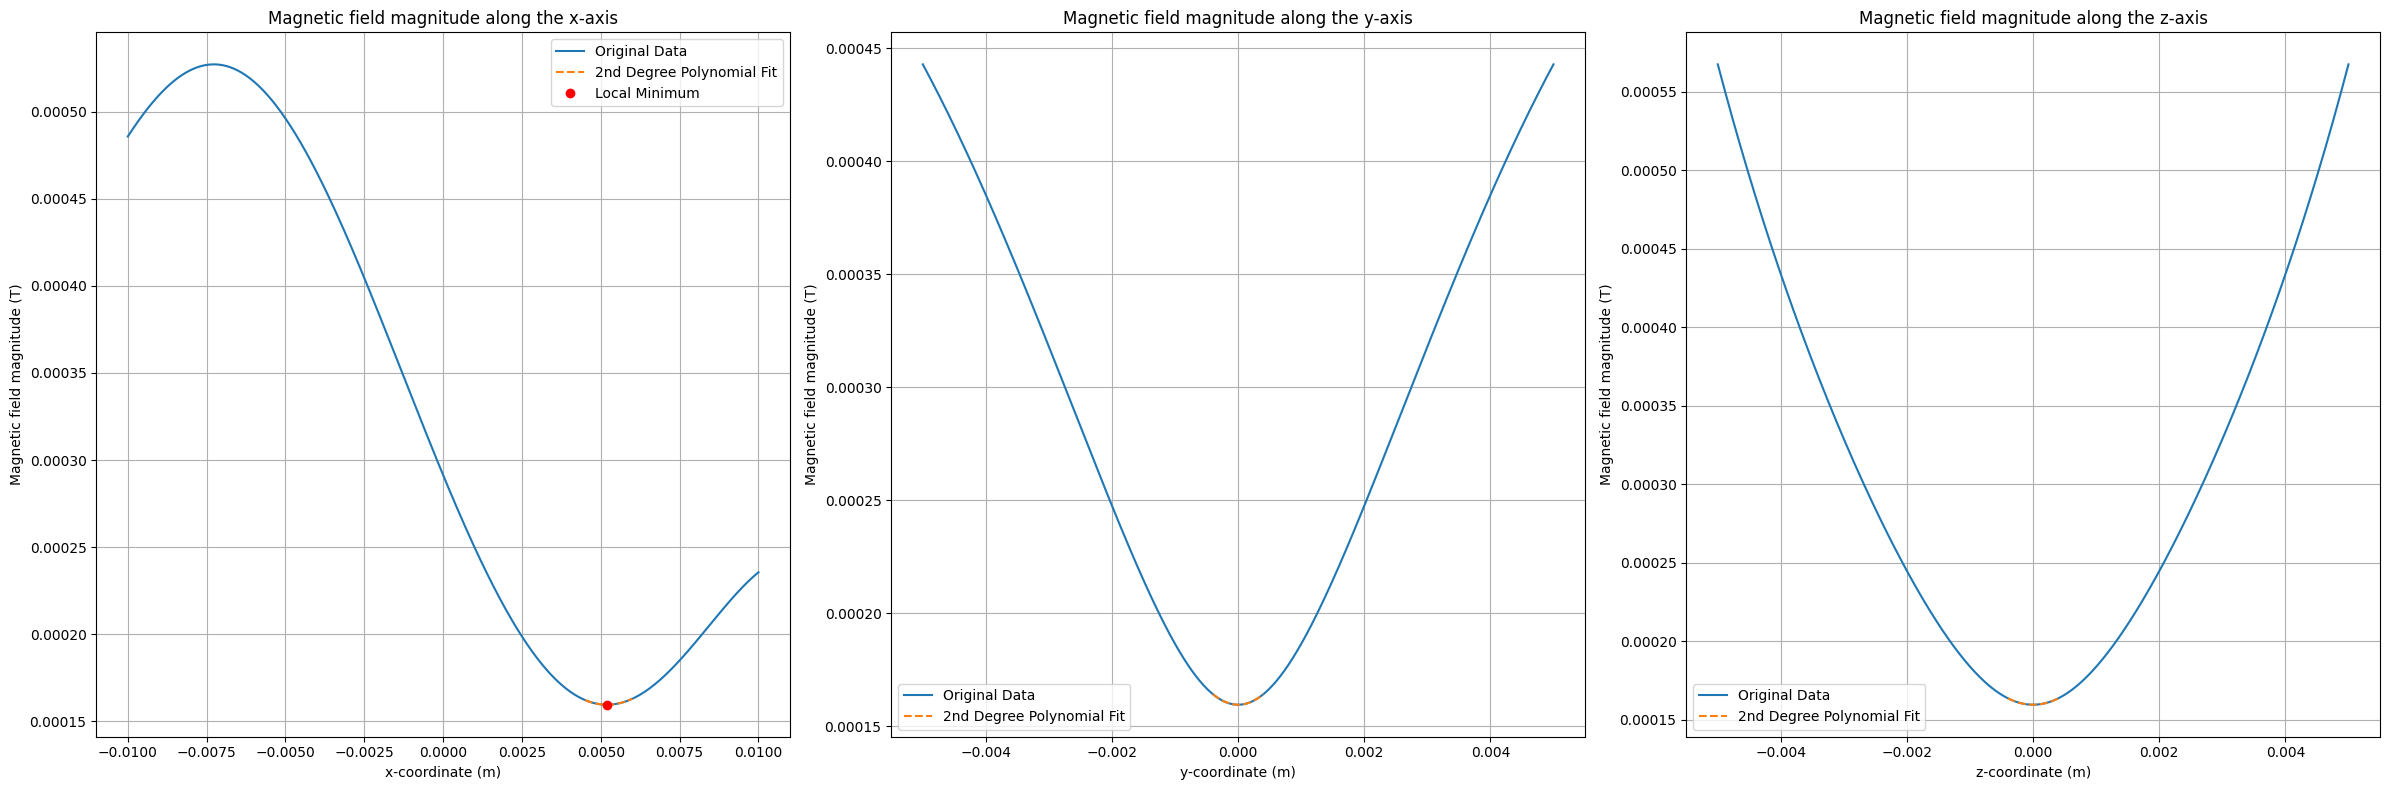

trap frequencies: fx = 27.50276469605346 , fy = 63.992021744055684 , fz = 59.88296502542203
trap bottom = 1.5959433855837757 G


In [4]:
#Plotting B_mags v/s co-ords before applying external bias field

fig, axs = plt.subplots(1, 3, figsize=(24, 8))

# Bx_mag v/s x
axs[0].plot(x_coords, Bx_mag, label='Original Data')
axs[0].plot(x_fit, Bx_fit, label='2nd Degree Polynomial Fit', linestyle='--')
axs[0].plot(Bx_minimum, px(Bx_minimum), 'ro', label='Local Minimum')
axs[0].set_xlabel('x-coordinate (m)')
axs[0].set_ylabel('Magnetic field magnitude (T)')
axs[0].set_title('Magnetic field magnitude along the x-axis')
axs[0].legend()
axs[0].grid(True)

# By_mag v/s y
axs[1].plot(y_coords, By_mag, label='Original Data')
axs[1].plot(y_fit, By_fit, label='2nd Degree Polynomial Fit', linestyle='--')
axs[1].set_xlabel('y-coordinate (m)')
axs[1].set_ylabel('Magnetic field magnitude (T)')
axs[1].set_title('Magnetic field magnitude along the y-axis')
axs[1].legend()
axs[1].grid(True)

# Bz_mag v/s z
axs[2].plot(z_coords, Bz_mag, label='Original Data')
axs[2].plot(z_fit, Bz_fit, label='2nd Degree Polynomial Fit', linestyle='--')
axs[2].set_xlabel('z-coordinate (m)')
axs[2].set_ylabel('Magnetic field magnitude (T)')
axs[2].set_title('Magnetic field magnitude along the z-axis')
axs[2].legend()
axs[2].grid(True)

plt.tight_layout()
plt.show()

print('trap frequencies:', 'fx =', fx, ',', 'fy =', fy, ',', 'fz =', fz)
print('trap bottom =', tb, 'G')

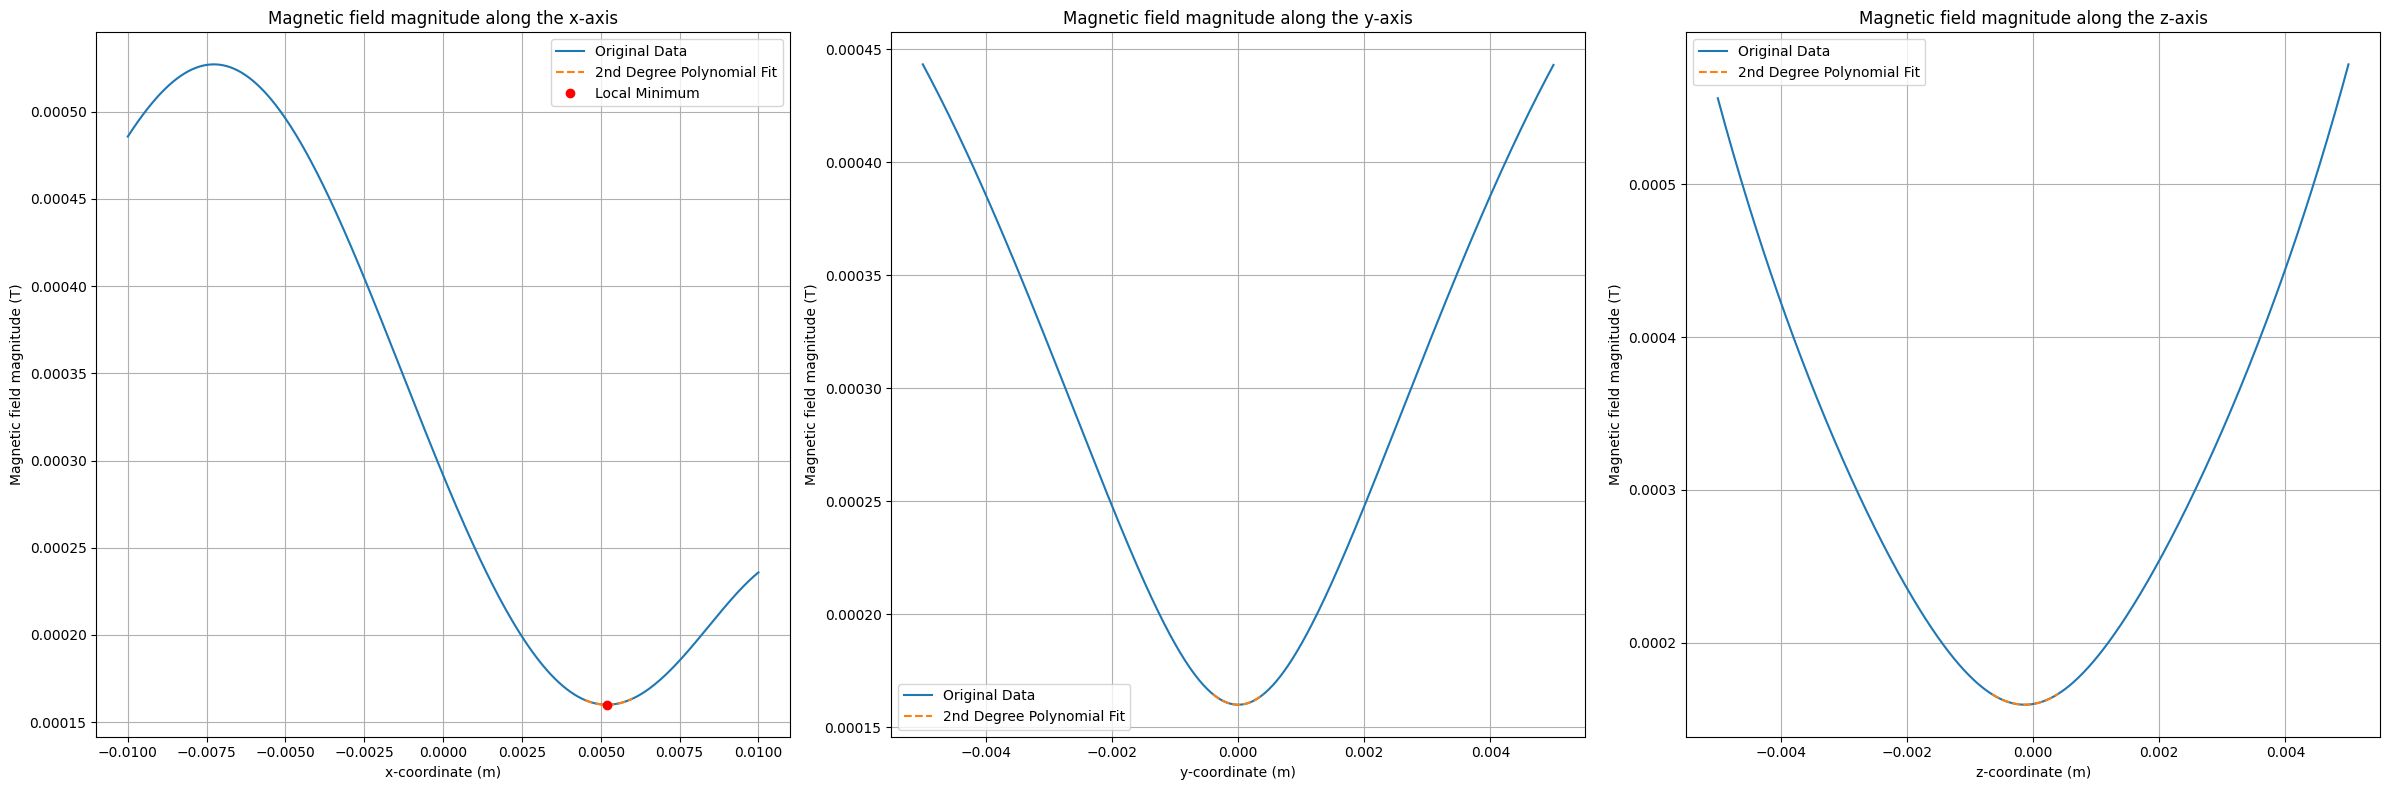

trap frequencies: fx = 27.47016155096208 , fy = 63.917742156222914 , fz = 59.7202124068877
trap bottom = 1.599789380280182 G


In [5]:
#Plotting B_mags v/s co-ords after applying external bias field

fig, axs = plt.subplots(1, 3, figsize=(24, 8))

# Bx_mag v/s x
axs[0].plot(x_coords, Bx_mag_new, label='Original Data')
axs[0].plot(x_fit_new, Bxnew_fit, label='2nd Degree Polynomial Fit', linestyle='--')
axs[0].plot(Bxnew_minimum, px_new(Bxnew_minimum), 'ro', label='Local Minimum')
axs[0].set_xlabel('x-coordinate (m)')
axs[0].set_ylabel('Magnetic field magnitude (T)')
axs[0].set_title('Magnetic field magnitude along the x-axis')
axs[0].legend()
axs[0].grid(True)

# By_mag v/s y
axs[1].plot(y_coords, By_mag_new, label='Original Data')
axs[1].plot(y_fit_new, Bynew_fit, label='2nd Degree Polynomial Fit', linestyle='--')
axs[1].set_xlabel('y-coordinate (m)')
axs[1].set_ylabel('Magnetic field magnitude (T)')
axs[1].set_title('Magnetic field magnitude along the y-axis')
axs[1].legend()
axs[1].grid(True)

# Bz_mag v/s z
axs[2].plot(z_coords, Bz_mag_new, label='Original Data')
axs[2].plot(z_fit_new, Bznew_fit, label='2nd Degree Polynomial Fit', linestyle='--')
axs[2].set_xlabel('z-coordinate (m)')
axs[2].set_ylabel('Magnetic field magnitude (T)')
axs[2].set_title('Magnetic field magnitude along the z-axis')
axs[2].legend()
axs[2].grid(True)

plt.tight_layout()
plt.show()

print('trap frequencies:', 'fx =', fx_new, ',', 'fy =', fy_new, ',', 'fz =', fz_new)
print('trap bottom =', tb_new, 'G')

In [6]:
#constants and input values for atom distribution plots

bohr_magneton = 9.274009994e-24  # Bohr magneton in J/T
m = 6.68e-27  # mass of 4He in kg
mu = 2*bohr_magneton #magnetic moment for 4He
k_B = 1.38e-23  # Boltzmann constant (J/K)
T = 10*1e-6  # Temperature in Kelvin
h = 6.626*1e-34  # plancks constant
h_bar = h/(2*np.pi) #reduced plancks constant
c = 3e8
f_atoms = 2.767321865262e14  # Atomic transition frequency in Hz

In [7]:
#define functions to calculate the energy and probability distribution of atoms 

def E(B):
    E = mu*B
    return E

def PD(E):
    PD = np.exp(-E/(k_B*T))
    PD /= np.sum(PD)
    return PD


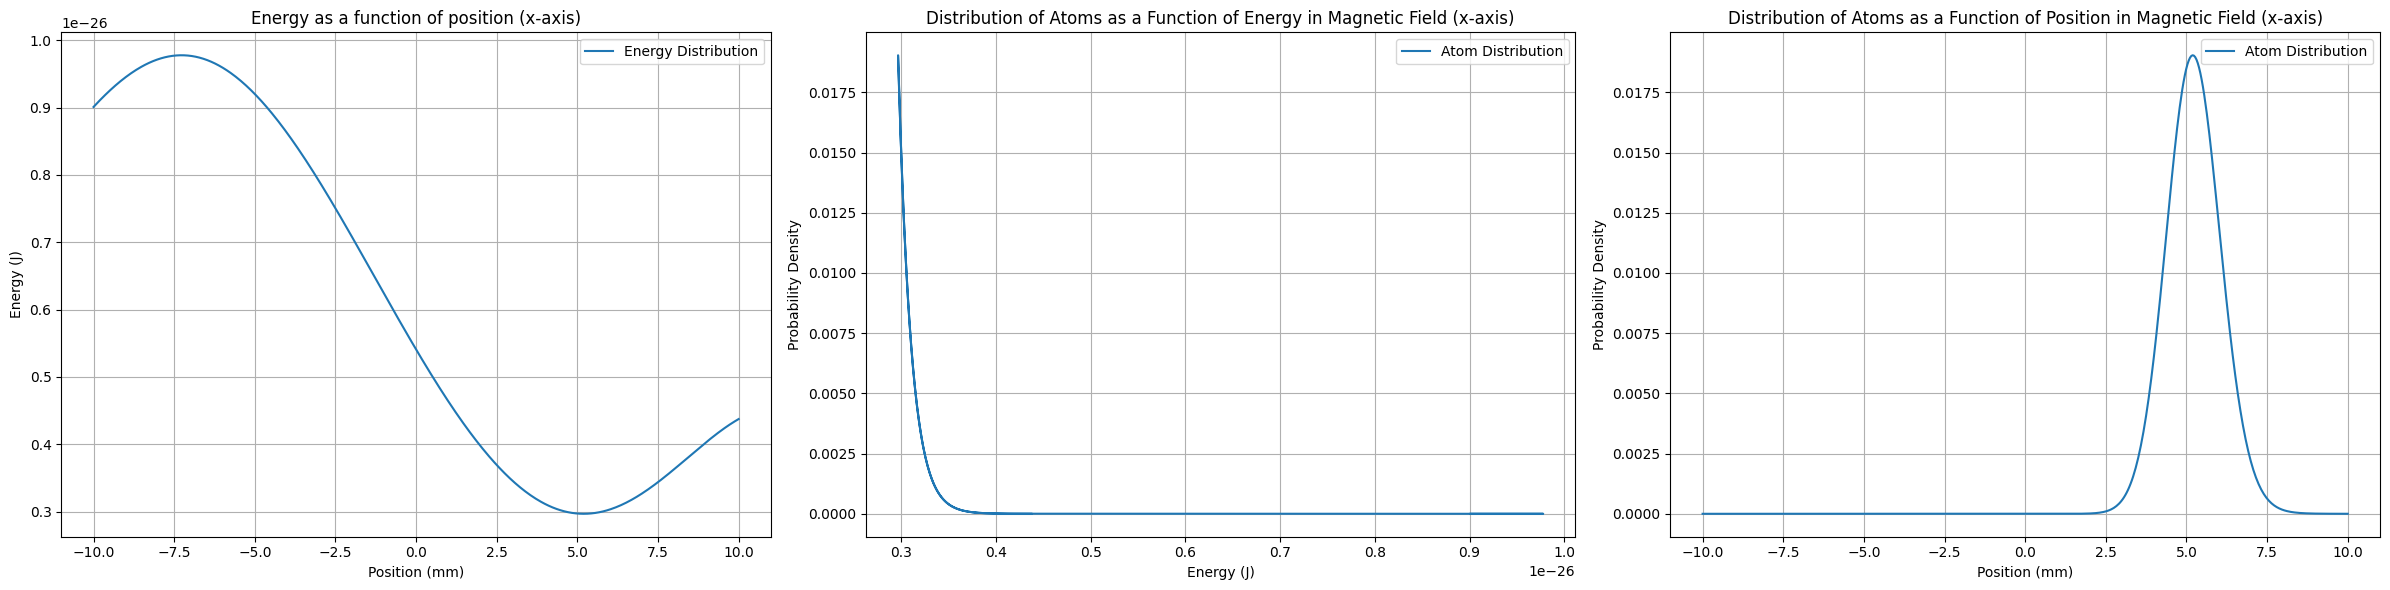

In [8]:
#plotting energy and probability distributions along x axis

Ex = E(Bx_mag_new)
PDx = PD(Ex)

fig, axs = plt.subplots(1, 3, figsize=(24, 6))

# Plot energy as a function of position
axs[0].plot(x_coords*1e3, Ex, label='Energy Distribution')
axs[0].set_xlabel('Position (mm)')
axs[0].set_ylabel('Energy (J)')
axs[0].set_title('Energy as a function of position (x-axis)')
axs[0].legend()
axs[0].grid(True)

# Plot the distribution of atoms as a function of energy
axs[1].plot(Ex, PDx, label='Atom Distribution')
axs[1].set_xlabel('Energy (J)')
axs[1].set_ylabel('Probability Density')
axs[1].set_title('Distribution of Atoms as a Function of Energy in Magnetic Field (x-axis)')
axs[1].legend()
axs[1].grid(True)

# Plot the distribution of atoms as a function of position
axs[2].plot(x_coords * 1e3, PDx, label='Atom Distribution')
axs[2].set_xlabel('Position (mm)')
axs[2].set_ylabel('Probability Density')
axs[2].set_title('Distribution of Atoms as a Function of Position in Magnetic Field (x-axis)')
axs[2].legend()
axs[2].grid(True)

plt.tight_layout()
plt.show()

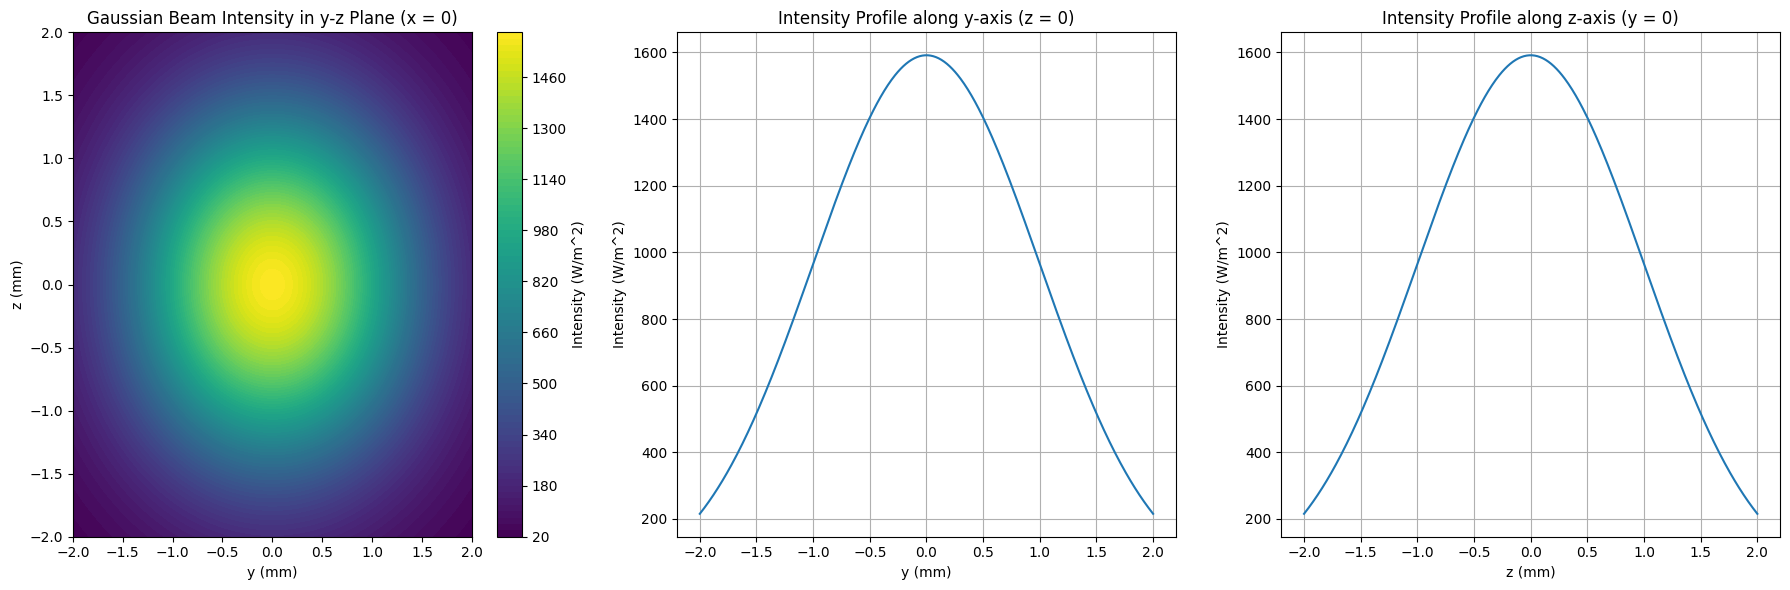

In [9]:
#Defining a Gaussian laser beam propagating along x axis

y = np.linspace(-2e-3, 2e-3, 500)
z = np.linspace(-2e-3, 2e-3, 500)
Y, Z = np.meshgrid(y, z)

#Constants and Parameters

w0 = 2e-3 # spot size of laser beam in m
P = 10e-3 # power of laser beam in W
gamma_0 = 2*np.pi*10e3 # natural linewidth of laser
lambda_laser = 1083.3e-9 # laser wavelength in meters (confirm which value to use)
z_R = np.pi * w0**2 / lambda_laser  # Rayleigh range in meters
I0 = 2 * P / (np.pi * w0**2)  # Peak intensity at the waist

# Gaussian beam intensity profile
def gaussian_beam_intensity(x, y, z, P, w0):
    w_x = w0 * np.sqrt(1 + (x / z_R)**2)
    I = I0 * (w0 / w_x)**2 * np.exp(-2 * (y**2 + z**2) / w_x**2)
    return I

# Calculate the intensity distribution at a given x position (e.g., x = 0)
x_position = 0  # At the beam waist
intensity_profile = gaussian_beam_intensity(x_position, Y, Z, P, w0)

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot the intensity distribution in the y-z plane at the beam waist (x = 0)
contour = axs[0].contourf(Y * 1e3, Z * 1e3, intensity_profile, levels=100, cmap='viridis')
fig.colorbar(contour, ax=axs[0], label='Intensity (W/m^2)')
axs[0].set_xlabel('y (mm)')
axs[0].set_ylabel('z (mm)')
axs[0].set_title('Gaussian Beam Intensity in y-z Plane (x = 0)')

# Plot the intensity along the y-axis at z = 0 (center of the beam)
axs[1].plot(y * 1e3, gaussian_beam_intensity(x_position, y, 0, P, w0))
axs[1].set_xlabel('y (mm)')
axs[1].set_ylabel('Intensity (W/m^2)')
axs[1].set_title('Intensity Profile along y-axis (z = 0)')
axs[1].grid(True)

# Plot the intensity along the z-axis at y = 0 (center of the beam)
axs[2].plot(z * 1e3, gaussian_beam_intensity(x_position, 0, z, P, w0))
axs[2].set_xlabel('z (mm)')
axs[2].set_ylabel('Intensity (W/m^2)')
axs[2].set_title('Intensity Profile along z-axis (y = 0)')
axs[2].grid(True)

plt.tight_layout()
plt.show()


In [10]:
# Doppler shift
def doppler_shift(k, v):
    return np.dot(k, v)

# Zeeman shift
def zeeman_shift(B):
    return -mu * B / h_bar

# Photon scattering rate calculation
def scattering_rate(I, Is, delta_omega, gamma_0):
    s_0 = I / Is  # Saturation parameter
    return (s_0 / (1 + s_0)) * (gamma_0 / 2) * (1 / (1 + (2 * delta_omega / gamma_0)**2))

# Sample x-positions based on the Maxwell-Boltzmann distribution
def boltzmann_atom_position():
    x_values = np.linspace(0, 10e-3, len(Bx_mag_new))  # x range from 0 to 10 mm
    B_values = Bx_mag_new  # Use precomputed B values along x-axis
    E_values = E(B_values)  # Calculate energy at each x position
    PD_values = PD(E_values)  # Calculate the probability distribution

    # Sample x position based on the calculated probabilities
    x = np.random.choice(x_values, p=PD_values)
    return np.array([x, 0, 0])  # y and z are zero since we focus on 1D


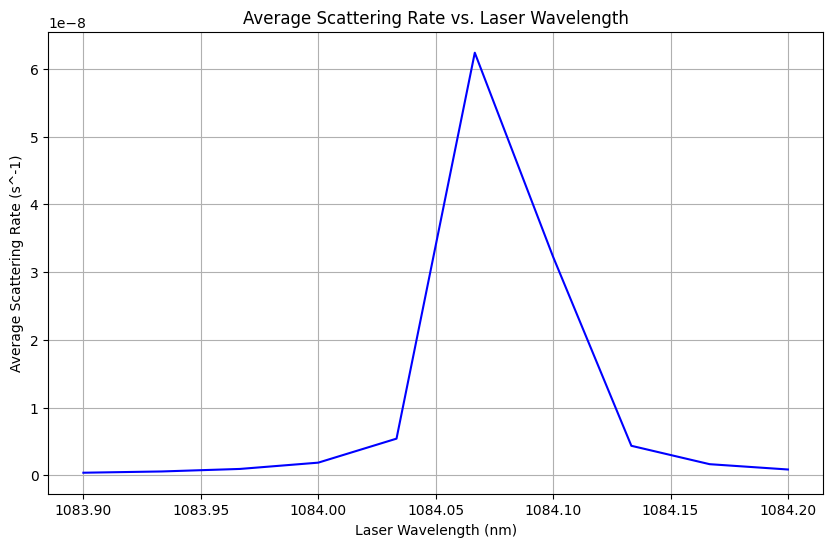

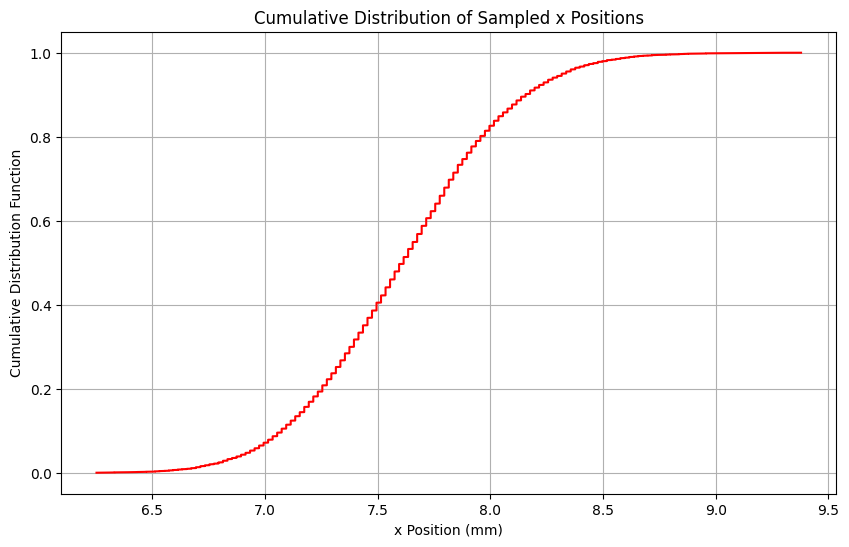

In [11]:
# Monte Carlo simulation
N_simulations = 1000
wavelengths = np.linspace(1083.9e-9, 1084.2e-9, 10)  # Wavelength range for scanning
avg_scattering_rates = []

# List to store sampled positions for verification
sampled_positions = []

for i, lambda_laser in enumerate(wavelengths):
    f_laser = c / lambda_laser  # Laser frequency
    k_laser = 2 * np.pi / lambda_laser * np.array([1, 0, 0])  # Laser wave vector
    z_R = np.pi * w0**2 / lambda_laser  # Rayleigh range in meters
    delta_omega_laser = 2 * np.pi * np.abs(f_laser - f_atoms)  # Laser detuning
    scattering_rates = []

    for j in range(N_simulations):
        # Sample atom position along the x-axis
        atom_position = boltzmann_atom_position()
        sampled_positions.append(atom_position[0])  # Store x-coordinate for verification
        B_field = Bx_mag[int(atom_position[0] * 1e3)]  # Use precomputed B field

        # Sample velocity along the x-axis
        v_T = np.random.normal(0, np.sqrt(2 * k_B * T / m))

        # Calculate intensity at the atom's position
        I = gaussian_beam_intensity(atom_position[0], atom_position[1], atom_position[2], P=10e-3, w0=2e-3)

        # Calculate total detuning
        delta_omega_doppler = np.dot(k_laser, np.array([v_T, 0, 0]))
        delta_omega_zeeman = zeeman_shift(B_field)
        delta_omega_total = delta_omega_laser + delta_omega_doppler + delta_omega_zeeman

        # Calculate scattering rate
        Is = np.pi * h_bar * c * gamma_0 / (3 * (lambda_laser**3))
        rate = scattering_rate(I, Is, delta_omega_total, gamma_0)
        scattering_rates.append(rate)

    avg_scattering_rates.append(np.mean(scattering_rates))

# Plot average scattering rate vs. wavelength
plt.figure(figsize=(10, 6))
plt.plot(wavelengths * 1e9, avg_scattering_rates, linestyle='-', color='b')
plt.xlabel('Laser Wavelength (nm)')
plt.ylabel('Average Scattering Rate (s^-1)')
plt.title('Average Scattering Rate vs. Laser Wavelength')
plt.grid(True)
plt.show()

# Plot the sampled x positions to verify the distribution
plt.figure(figsize=(10, 6))
plt.plot(np.sort(sampled_positions) * 1e3, np.linspace(0, 1, len(sampled_positions)), linestyle='-', color='r')
plt.xlabel('x Position (mm)')
plt.ylabel('Cumulative Distribution Function')
plt.title('Cumulative Distribution of Sampled x Positions')
plt.grid(True)
plt.show()

some comments for the last two cells:

need to figure out how to sample atoms according to boltzmann distribution for plotting the scattering rate
consider velocity component only along x-axis/laser propagation axis while calculating doppler shift - how? 